# Make the parallel coordinate plots and find the best model configuration

In [9]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
ds = pd.read_csv("./tunedU.csv")

In [3]:
ds

,max_samples,n_estimators,max_depth,criterion,verbose,LL_RF_up
0,6205483,1,12.0,gini,9,0.096623
1,6205483,1,12.0,entropy,9,0.096644
2,6205483,1,12.0,log_loss,9,0.095180
3,6205483,1,50.0,gini,9,0.975630
4,6205483,1,50.0,entropy,9,0.948917
5,6205483,1,50.0,log_loss,9,0.944667
6,6205483,1,NaN,gini,9,0.964633
7,6205483,1,NaN,entropy,9,0.946061
8,6205483,1,NaN,log_loss,9,0.954111
9,6205483,30,12.0,gini,9,0.087002


In [6]:
fig = px.parallel_coordinates(ds, color='LL_RF_up',
                                dimensions=['n_estimators','max_depth', 'criterion'],
                                color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [32]:
nan = ds['max_depth'][7] 
df = ds.replace(to_replace=['gini','entropy','log_loss',nan],value=[30,60,90,100])


/var/folders/dd/vs2td51d7b366p_g2_844p100000gq/T/ipykernel_46273/1811623317.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = ds.replace(to_replace=['gini','entropy','log_loss',nan],value=[30,60,90,100])


In [126]:
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    cmap = mpl.cm.cool # viridis, magma
    bounds = [0.03,0.04,0.05,0.06,0.07,0.08,0.09]
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N, extend='both')
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        color = scalar_map.to_rgba(class_col[i])
        ax.plot(x, y, color=color, alpha=0.3, **kwds)
        # ax.set_ylim([min(y),max(y)])

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax1 = ax.twinx()
    ax1.set_yticks([0.315,0.587,0.864])
    ax1.set_yticklabels(['gini','entropy','log_loss'])

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.set_title('Parallel Coordinate Plot of Hyperparameters')
    ax.grid()

    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                    ax=ax)

    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


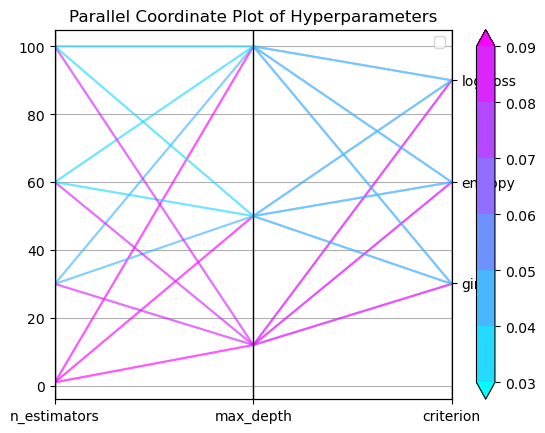

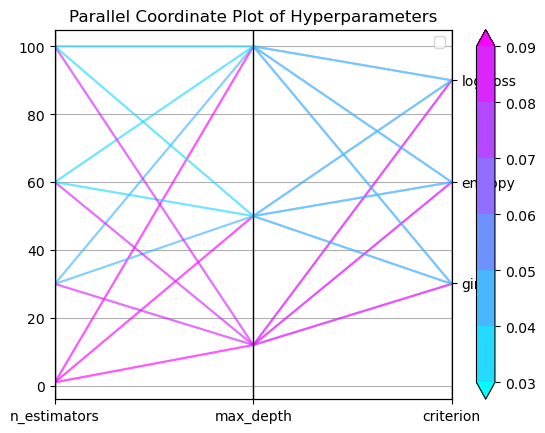

In [127]:
df = df[['n_estimators','max_depth','criterion','LL_RF_up']]
parallel_coordinates(df, 'LL_RF_up')
